# MovieLens-32M 数据分析

## 1. 导入库并加载数据

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
# 设置中文字体 (Mac系统)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS'] # 或者 'Heiti SC'
plt.rcParams['axes.unicode_minus'] = False # 解决负号显示问题

In [25]:
# 定义数据路径
DATA_DIR = '../data/ml-32m/'

# 加载数据
movies = pd.read_csv(DATA_DIR + 'movies.csv')
ratings = pd.read_csv(DATA_DIR + 'ratings.csv')

## 2. 探索性数据分析 (EDA)

### 2.1 电影数据 (movies.csv)

In [26]:
print("电影数据信息:")
movies.info()

电影数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  87585 non-null  int64 
 1   title    87585 non-null  object
 2   genres   87585 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [27]:
print("\n电影数据前5行:")
movies.head()


电影数据前5行:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


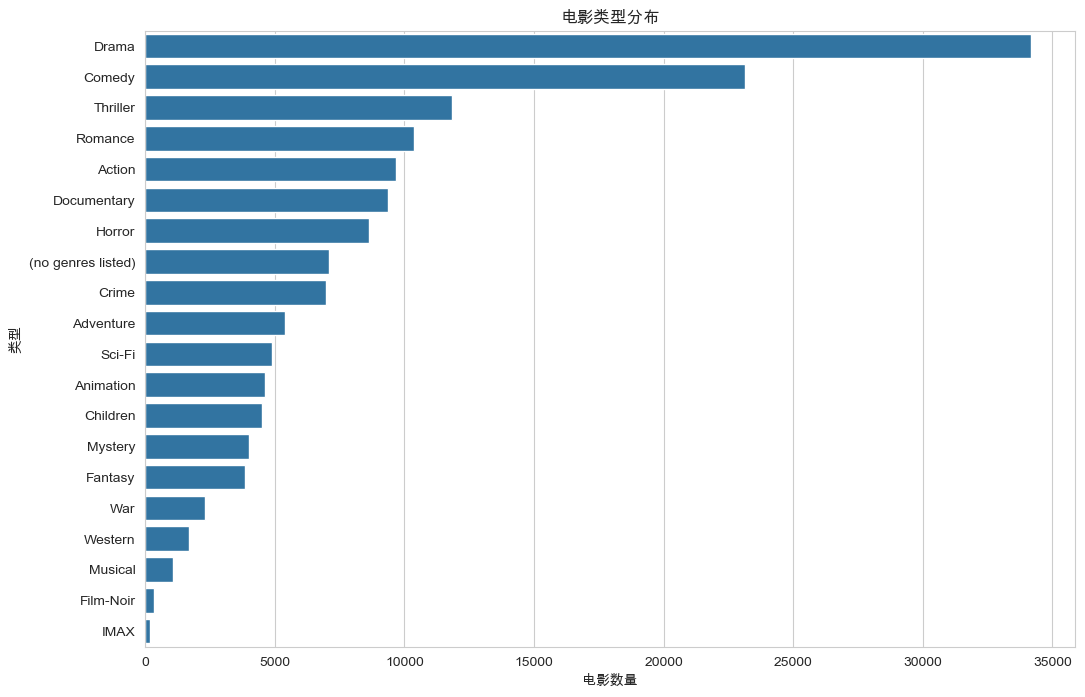

In [28]:
# 电影类型分析
genres_list = movies['genres'].str.split('|').explode()
plt.figure(figsize=(12, 8))
sns.countplot(y=genres_list, order=genres_list.value_counts().index)
plt.title('电影类型分布')
plt.xlabel('电影数量')
plt.ylabel('类型')
plt.show()

### 2.2 评分数据 (ratings.csv)

In [29]:
print("评分数据信息:")
ratings.info()

评分数据信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 976.6 MB


In [30]:
print("\n评分数据前5行:")
ratings.head()


评分数据前5行:


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


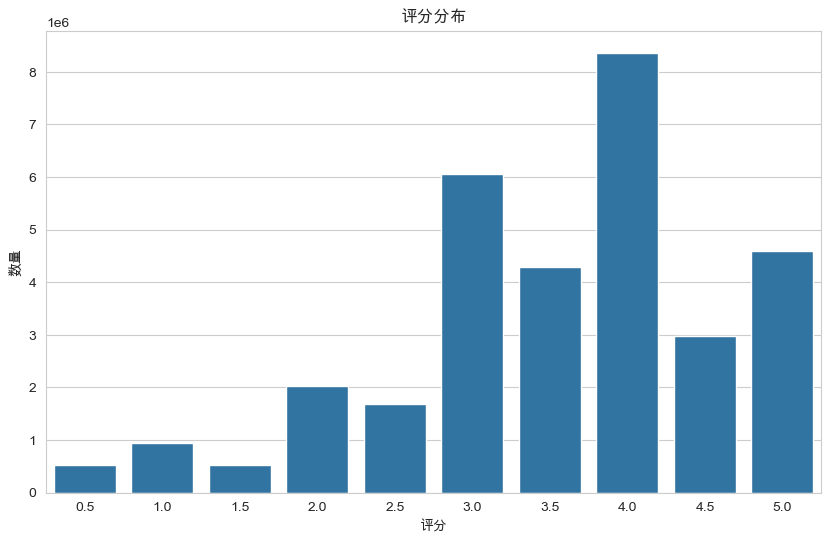

In [31]:
# 评分分布
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('评分分布')
plt.xlabel('评分')
plt.ylabel('数量')
plt.show()

每个用户评分数量的描述性统计:
count    200948.000000
mean        159.246193
std         282.025462
min          20.000000
25%          36.000000
50%          73.000000
75%         167.000000
max       33332.000000
dtype: float64


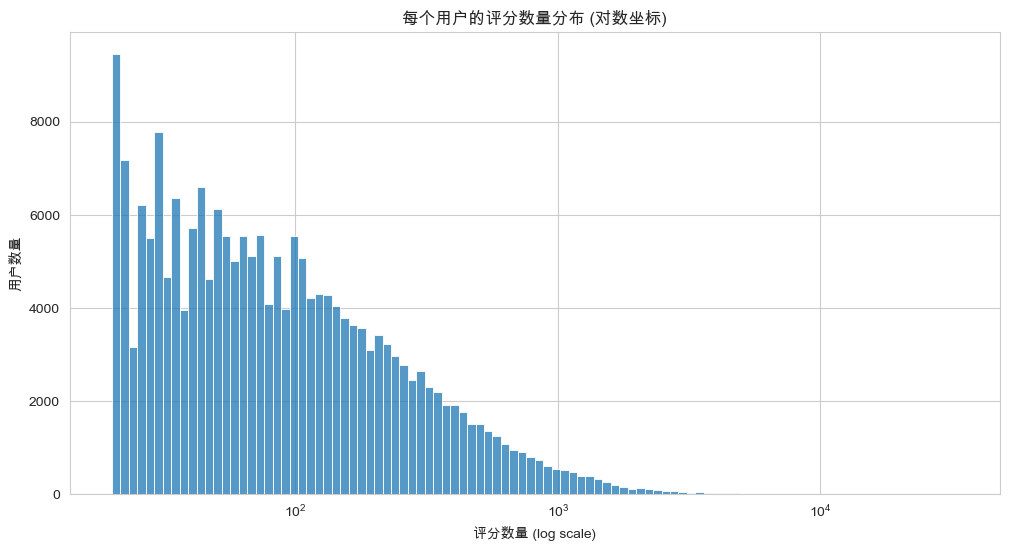

In [32]:
# 每个用户的评分数量
user_rating_counts = ratings.groupby('userId').size()
print("每个用户评分数量的描述性统计:")
print(user_rating_counts.describe())

plt.figure(figsize=(12, 6))
sns.histplot(user_rating_counts, bins=100, kde=False, log_scale=True)
plt.title('每个用户的评分数量分布 (对数坐标)')
plt.xlabel('评分数量 (log scale)')
plt.ylabel('用户数量')
plt.show()

每部电影评分数量的描述性统计:
count     84432.000000
mean        379.005638
std        2592.439791
min           1.000000
25%           2.000000
50%           5.000000
75%          25.000000
max      102929.000000
dtype: float64


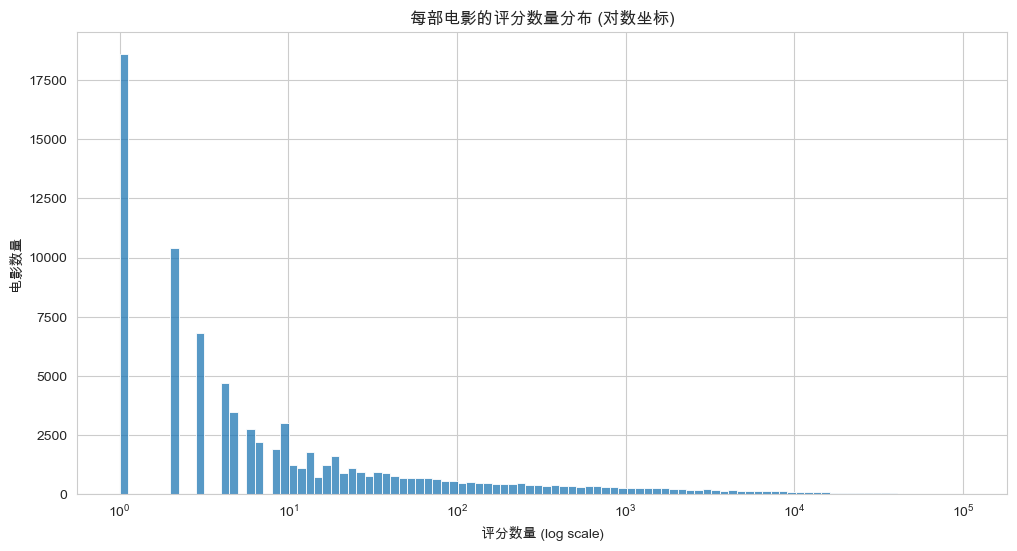

In [33]:
# 每部电影的评分数量
movie_rating_counts = ratings.groupby('movieId').size()
print("每部电影评分数量的描述性统计:")
print(movie_rating_counts.describe())

plt.figure(figsize=(12, 6))
sns.histplot(movie_rating_counts, bins=100, kde=False, log_scale=True)
plt.title('每部电影的评分数量分布 (对数坐标)')
plt.xlabel('评分数量 (log scale)')
plt.ylabel('电影数量')
plt.show()

## 3. 合并数据

In [34]:
df = pd.merge(ratings, movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,17,4.0,944249077,Sense and Sensibility (1995),Drama|Romance
1,1,25,1.0,944250228,Leaving Las Vegas (1995),Drama|Romance
2,1,29,2.0,943230976,"City of Lost Children, The (Cité des enfants p...",Adventure|Drama|Fantasy|Mystery|Sci-Fi
3,1,30,5.0,944249077,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
4,1,32,5.0,943228858,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


In [35]:
# 计算每部电影的平均分和评分次数
movie_stats = df.groupby('title').agg(rating_mean=('rating', 'mean'),
                                     rating_count=('rating', 'count')).reset_index()

print("电影平均分和评分次数:")
movie_stats.head()

电影平均分和评分次数:


,title,rating_mean,rating_count
0,(2019),2.657143,35
1,"""BLOW THE NIGHT!"" Let's Spend the Night Togeth...",2.000000,2
2,"""Great Performances"" Cats (1998)",2.917373,236
3,"""Sr."" (2022)",3.227273,11
4,#1 Cheerleader Camp (2010),2.000000,13


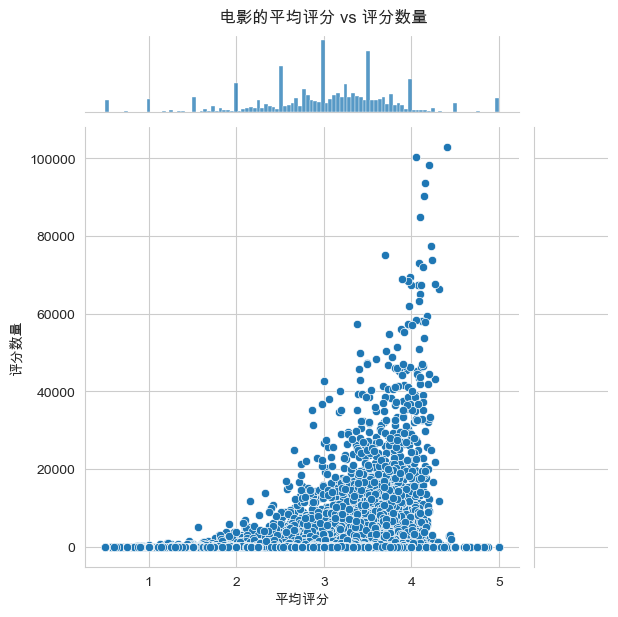

In [36]:
# 评分次数与平均分的关系
g = sns.jointplot(x='rating_mean', y='rating_count', data=movie_stats)
g.ax_joint.set_xlabel('平均评分')
g.ax_joint.set_ylabel('评分数量')
g.fig.suptitle('电影的平均评分 vs 评分数量', y=1.02)
plt.show()

In [37]:
# 最受欢迎（评分次数最多）的电影
popular_movies = movie_stats.sort_values('rating_count', ascending=False)
print("\n评分次数最多的电影 Top 10:")
popular_movies.head(10)


评分次数最多的电影 Top 10:


,title,rating_mean,rating_count
58799,"Shawshank Redemption, The (1994)",4.404614,102929
25132,Forrest Gump (1994),4.052744,100296
53404,Pulp Fiction (1994),4.196969,98409
42977,"Matrix, The (1999)",4.156437,93808
59415,"Silence of the Lambs, The (1991)",4.148367,90330
61795,Star Wars: Episode IV - A New Hope (1977),4.099824,85010
23951,Fight Club (1999),4.228780,77332
35733,Jurassic Park (1993),3.698623,75233
57456,Schindler's List (1993),4.236990,73849
40329,"Lord of the Rings: The Fellowship of the Ring,...",4.092134,73122


In [38]:
# 评分最高的电影（至少有1000次评分）
high_rated_movies = movie_stats[movie_stats['rating_count'] >= 1000].sort_values('rating_mean', ascending=False)
print("\n评分最高的电影 Top 10 (评分次数 > 1000):")
high_rated_movies.head(10)


评分最高的电影 Top 10 (评分次数 > 1000):


,title,rating_mean,rating_count
51975,Planet Earth II (2016),4.446830,1956
51974,Planet Earth (2006),4.444369,2948
7442,Band of Brothers (2001),4.426539,2811
58799,"Shawshank Redemption, The (1994)",4.404614,102929
27402,"Godfather, The (1972)",4.317030,66440
50616,Parasite (2019),4.312254,11670
10317,Blue Planet II (2017),4.300086,1163
78059,Twin Peaks (1989),4.298684,1140
256,12 Angry Men (1957),4.265311,21863
79084,"Usual Suspects, The (1995)",4.265070,67750


## 4. 结论与后续步骤

通过初步分析，我们了解了：
1. 电影类型、评分的整体分布情况。
2. 用户和电影的活跃度（评分数量）分布，存在长尾效应。
3. 最受欢迎和评分最高的电影。

**后续步骤:**
1. **特征工程:** 从'genres'、'timestamp'等字段提取更多特征。
2. **召回策略:** 基于物品的协同过滤 (Item-based CF), 基于用户的协同过滤 (User-based CF), 矩阵分解 (SVD) 等。
3. **模型训练与评估:** 划分训练集和测试集，使用RMSE、Precision@k、Recall@k等指标评估模型性能。